<a href="https://colab.research.google.com/github/luisovillista/Proyecto_Integrador/blob/main/J%26J_Obesity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obesity or CVD risk (Classify/Regressor/Cluster)

About Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

# 1. Carga y exploración de datos

In [36]:
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle).csv')







In [37]:
# Mostrar las primeras filas del conjunto de datos
print(data.head(5))

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [38]:
# Resumen estadístico de las variables
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [39]:
# Información sobre el conjunto de datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21



---



# 2. Limpieza de datos

In [40]:
# Identificar y manejar valores faltantes
print(data.isnull().sum())

# Imputar o eliminar valores faltantes
data = data.dropna()  # En este caso, eliminamos filas con valores faltantes

# Verificar valores duplicados
print(data.duplicated().sum())

# Eliminar valores duplicados
data = data.drop_duplicates()

# Convertir columnas categóricas a variables dummy (si es necesario)
data = pd.get_dummies(data, drop_first=True)




Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
24


In [41]:
# Verificar cambios
data.head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,False,True,...,False,False,True,False,True,False,False,False,False,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,False,True,...,False,False,True,False,True,False,False,False,False,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,True,True,...,False,False,True,False,True,False,False,False,False,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,True,False,...,False,False,False,True,False,False,False,False,True,False
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,True,False,...,False,False,True,False,False,False,False,False,False,True


In [42]:
# Mostrar los nombres de las columnas
print("Columnas:")
print(data.columns)

Columnas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')




---



# 3. Análisis descriptivo

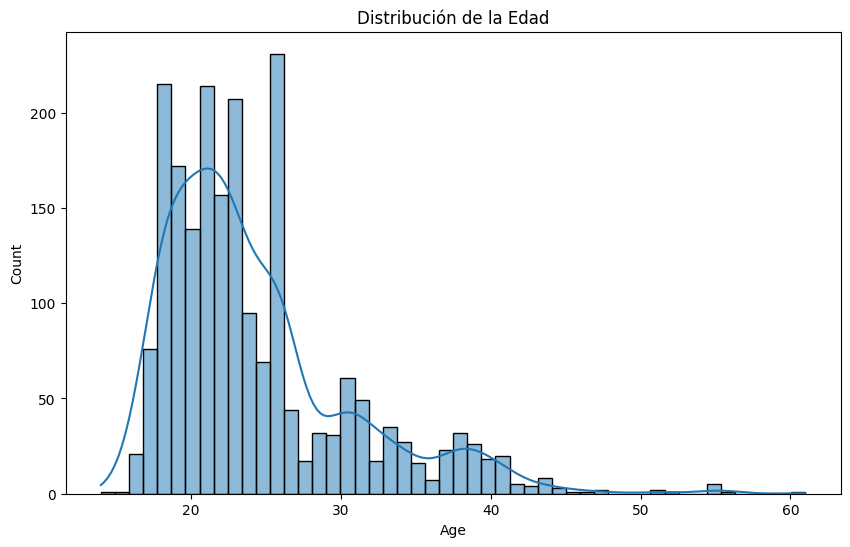

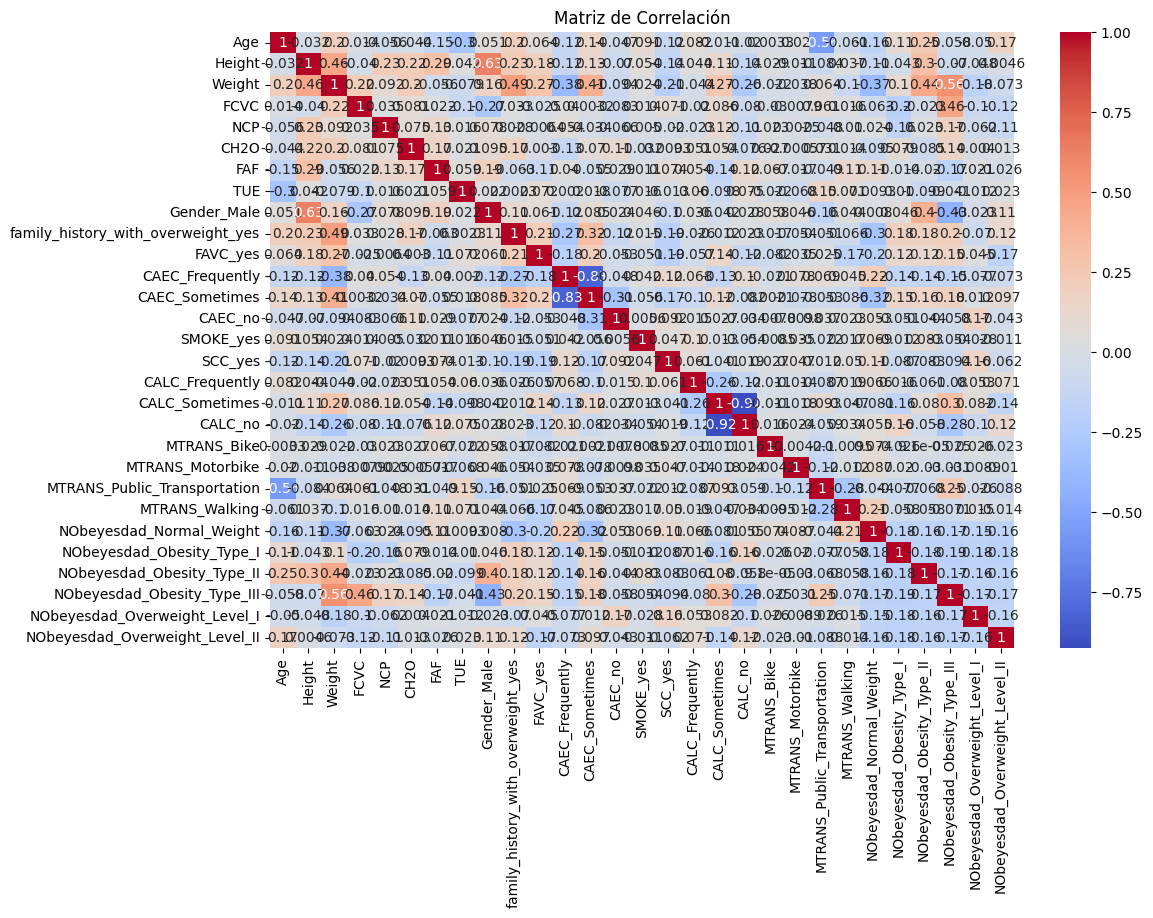

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de variables clave
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


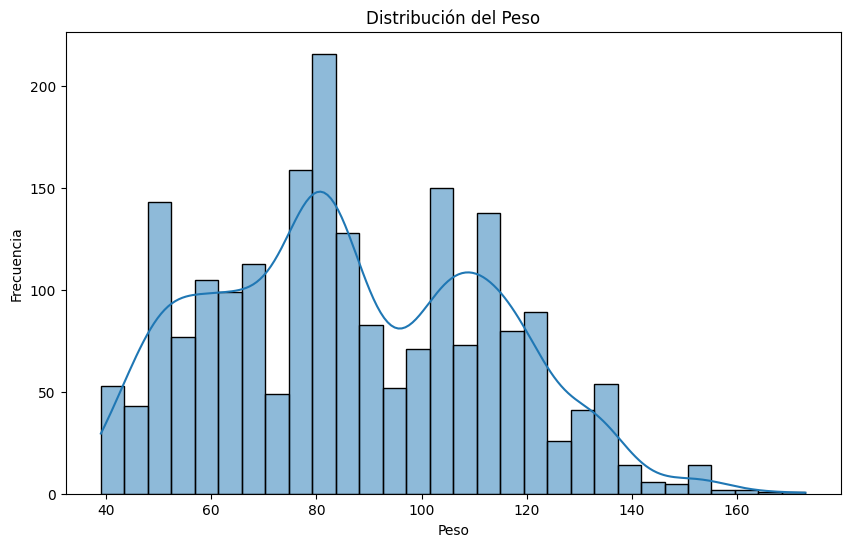

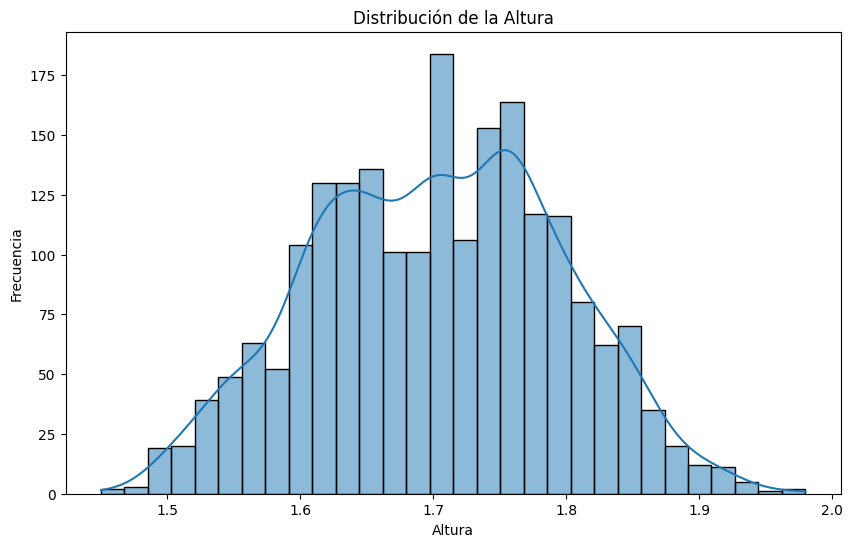

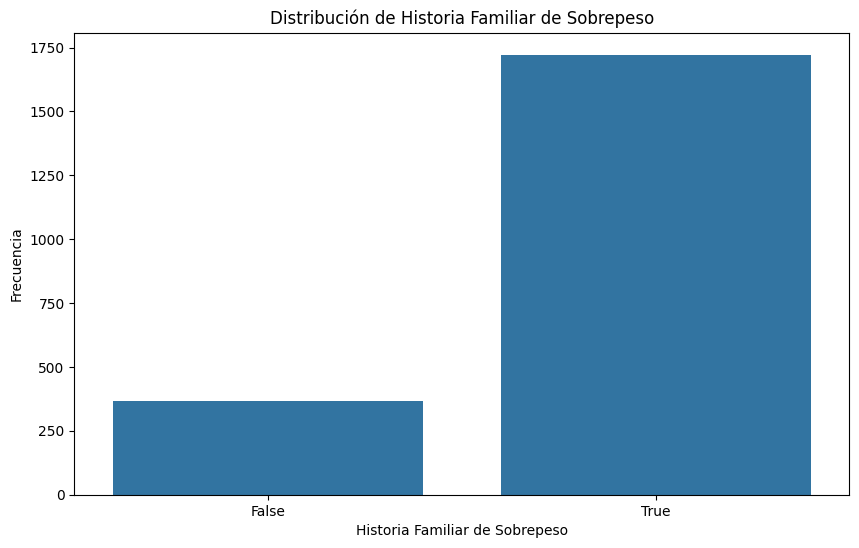

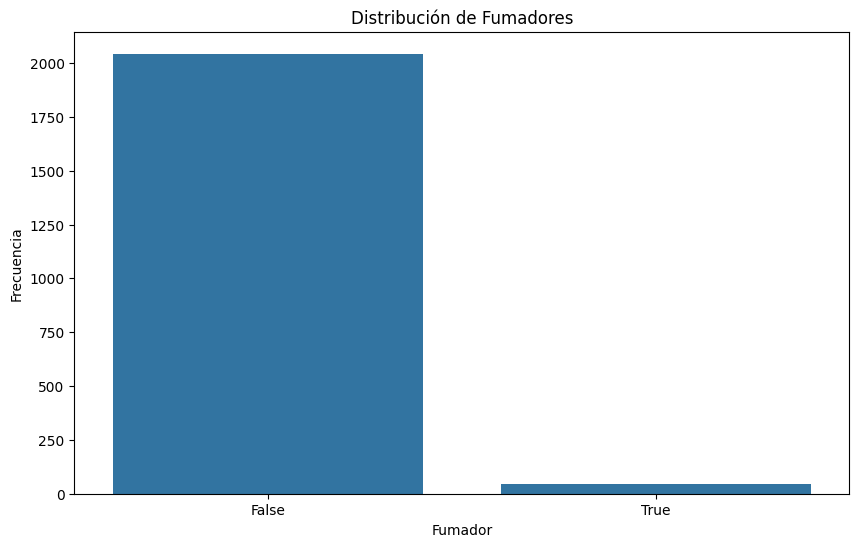

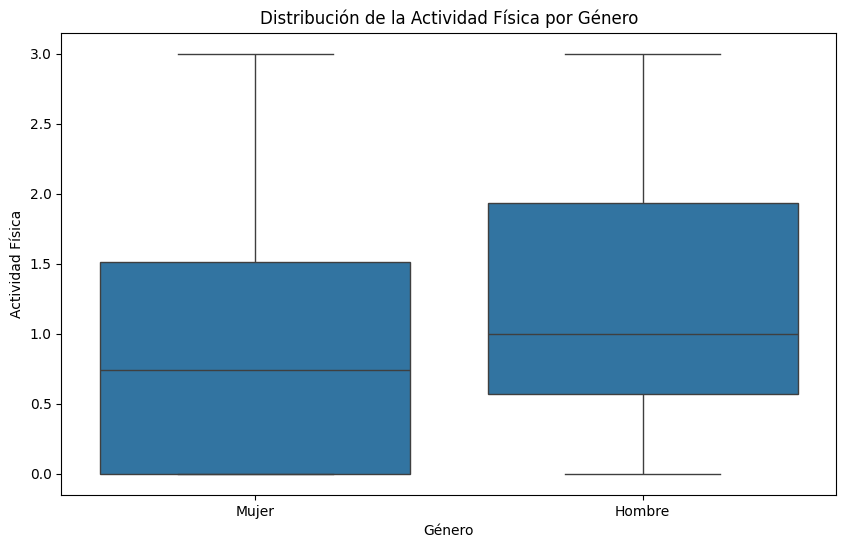

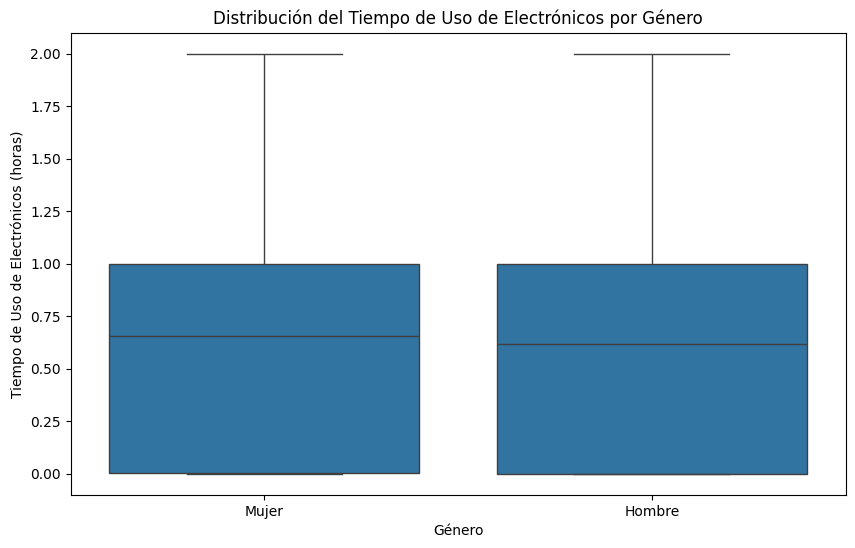

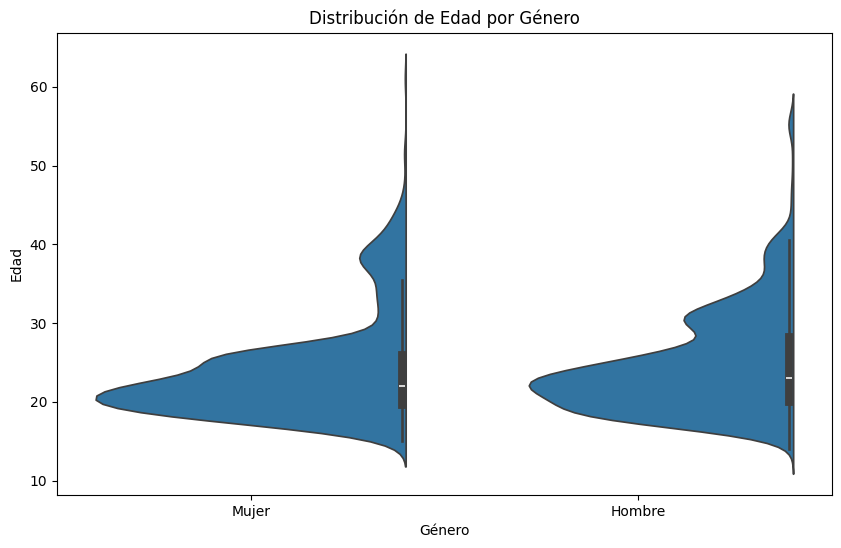

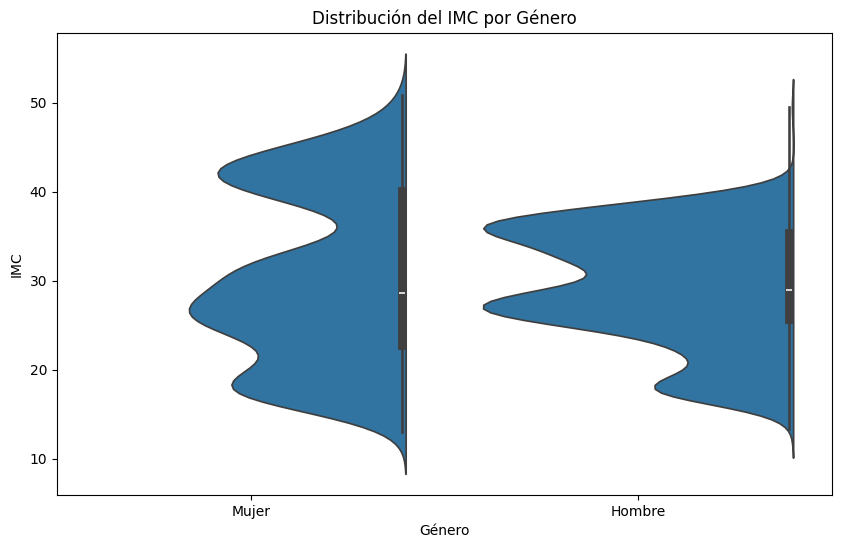

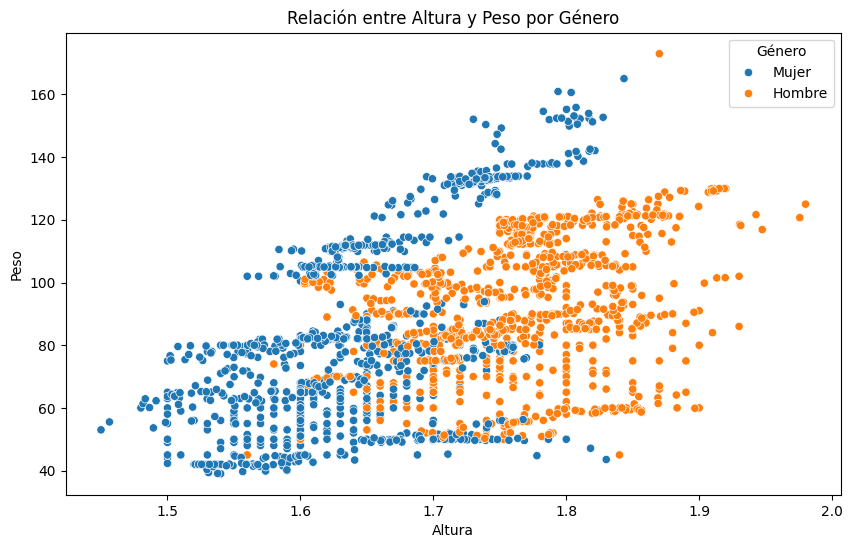

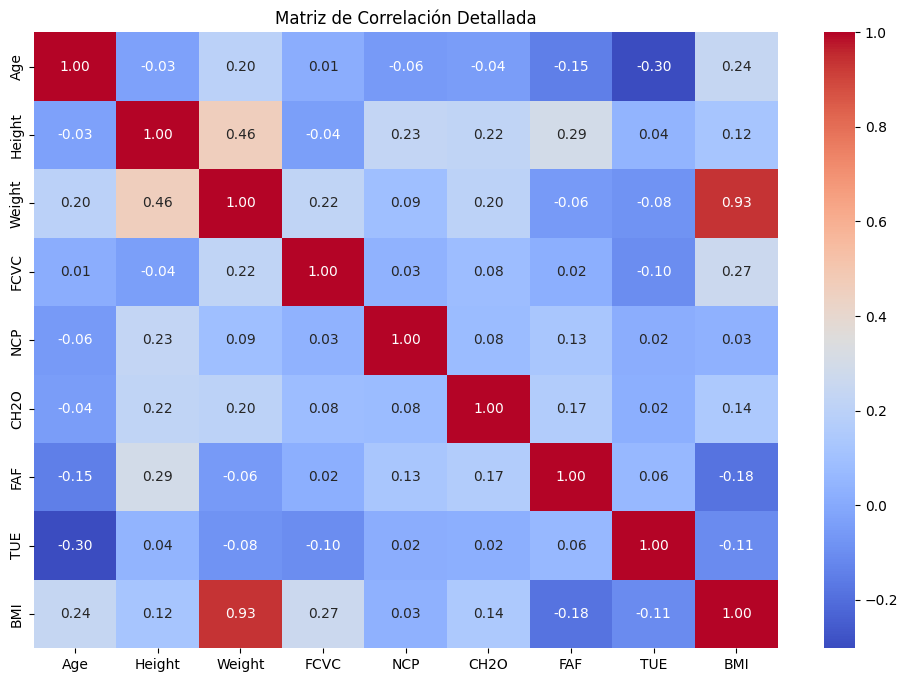

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna para el género con etiquetas 'Hombre' y 'Mujer'
data['Gender'] = data['Gender_Male'].apply(lambda x: 'Hombre' if x else 'Mujer')

# Histogramas y Densidades de Variables Continuas
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], kde=True, bins=30)
plt.title('Distribución del Peso')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], kde=True, bins=30)
plt.title('Distribución de la Altura')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()

# Gráficos de Barras para Variables Categóricas
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', data=data)
plt.title('Distribución de Historia Familiar de Sobrepeso')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKE_yes', data=data)
plt.title('Distribución de Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')
plt.show()

# Gráficos de Cajas y Bigotes (Boxplots)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='FAF', data=data)
plt.title('Distribución de la Actividad Física por Género')
plt.xlabel('Género')
plt.ylabel('Actividad Física')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TUE', data=data)
plt.title('Distribución del Tiempo de Uso de Electrónicos por Género')
plt.xlabel('Género')
plt.ylabel('Tiempo de Uso de Electrónicos (horas)')
plt.show()

# Gráficos de Violín (Violin Plots)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=data, split=True)
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

data['BMI'] = data['Weight'] / (data['Height'] ** 2)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='BMI', data=data, split=True)
plt.title('Distribución del IMC por Género')
plt.xlabel('Género')
plt.ylabel('IMC')
plt.show()

# Gráficos de Dispersión (Scatter Plots)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=data)
plt.title('Relación entre Altura y Peso por Género')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(title='Género')
plt.show()

# Mapas de Calor (Heatmaps)
# Excluir columnas no numéricas
numeric_data = data.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación Detallada')
plt.show()


Interpretación de los Gráficos del Análisis Descriptivo
1. Distribución de la Edad
Observaciones:

-La mayoría de los individuos en el conjunto de datos tienen entre 15 y 30 años, con un pico notable entre 20 y 25 años.
-Hay una disminución gradual en el número de individuos a medida que aumenta la edad, con muy pocos individuos mayores de 40 años.
-La distribución tiene una cola larga a la derecha, lo que indica la presencia de algunas personas mayores en el conjunto de datos.
Interpretación:

-La concentración de individuos jóvenes podría influir en los análisis posteriores, especialmente si la prevalencia de obesidad y comorbilidades varía significativamente con la edad.
-Es posible que necesitemos realizar un análisis específico por grupos de edad para comprender mejor las tendencias y patrones en diferentes cohortes de edad.


2. Matriz de Correlación
Observaciones:

-Las correlaciones más fuertes (positivas y negativas) están resaltadas en rojo y azul oscuro, respectivamente.
-Hay una correlación positiva notable entre Weight y BMI, lo cual es esperado ya que el IMC se calcula a partir del peso y la altura.
family_history_with_overweight_yes muestra una correlación moderada con varios tipos de obesidad (NObeyesdad_Obesity_Type_I, NObeyesdad_Obesity_Type_II, NObeyesdad_Obesity_Type_III).
FAF (actividad física en el tiempo libre) tiene una correlación negativa con los tipos de obesidad, lo que sugiere que más actividad física podría estar asociada con menores niveles de obesidad.
-Gender_Male tiene una correlación moderada con algunos tipos de obesidad, lo que sugiere diferencias de género en la prevalencia de la obesidad.

Interpretación:

-Las variables relacionadas con la dieta (FCVC, NCP, CH2O) y el comportamiento (FAF, TUE) tienen correlaciones variadas con la obesidad, lo que indica que estos factores deben ser considerados en cualquier análisis predictivo.
-La presencia de historia familiar de sobrepeso como un factor correlacionado con la obesidad sugiere una posible predisposición genética.
-La correlación entre el género y la obesidad indica que puede haber diferencias significativas entre hombres y mujeres que deben ser exploradas más a fondo.
-Los patrones de correlación ayudan a identificar variables relevantes que podrían ser importantes para la construcción de modelos predictivos y para la comprensión de los factores de riesgo asociados con la obesidad.



Siguientes Pasos
1. Análisis de Edad y Género: Realizar análisis específicos por grupos de edad y género para entender mejor las distribuciones y patrones observados.
2. Modelado Predictivo: Utilizar las variables identificadas con correlaciones significativas para construir modelos predictivos que identifiquen a los candidatos ideales para la cirugía bariátrica.
3. Análisis de Factores de Riesgo: Investigar más a fondo los factores de riesgo relacionados con la dieta y el comportamiento para formular recomendaciones basadas en datos.



---



# 4. Análisis de diagnóstico

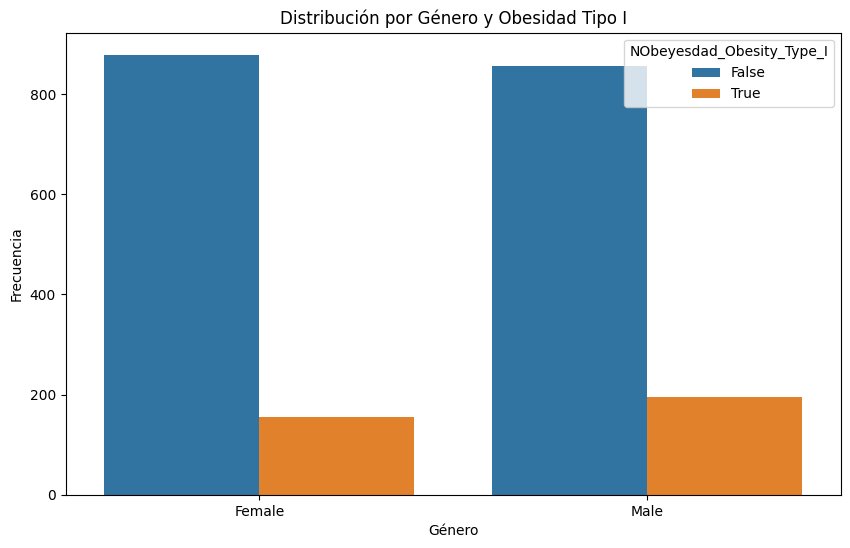

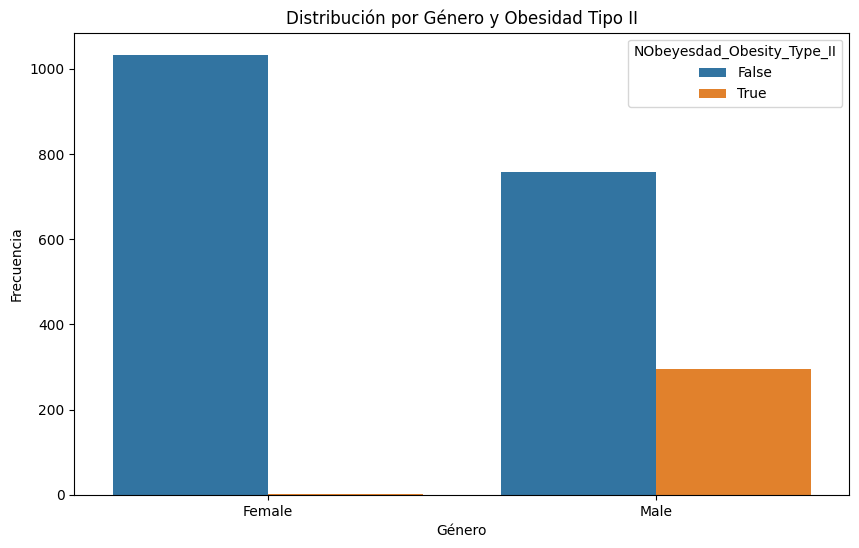

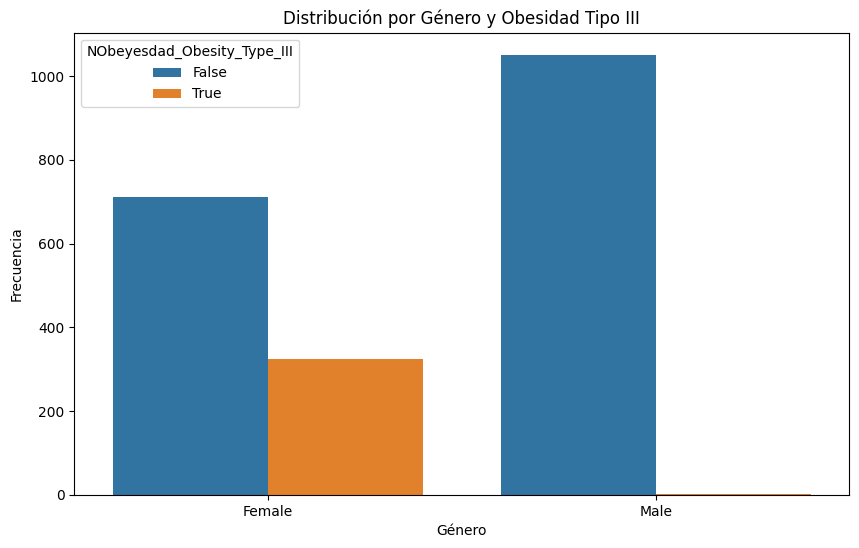

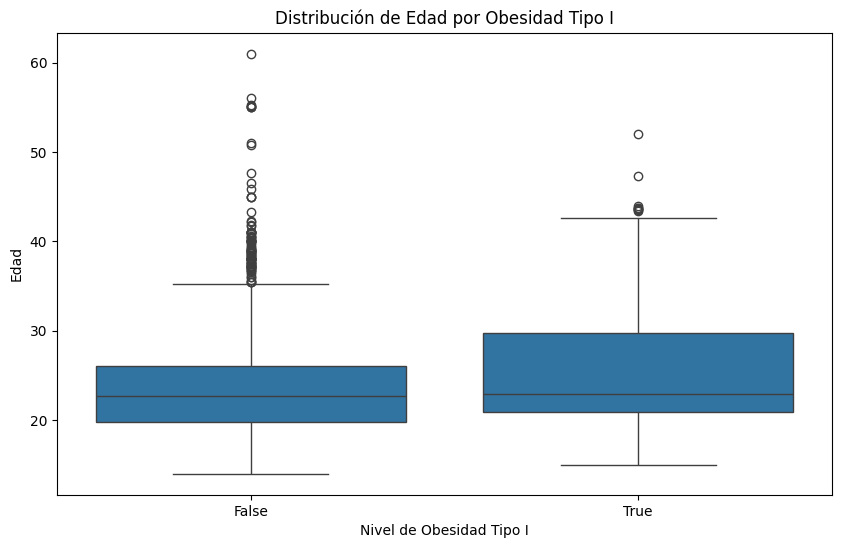

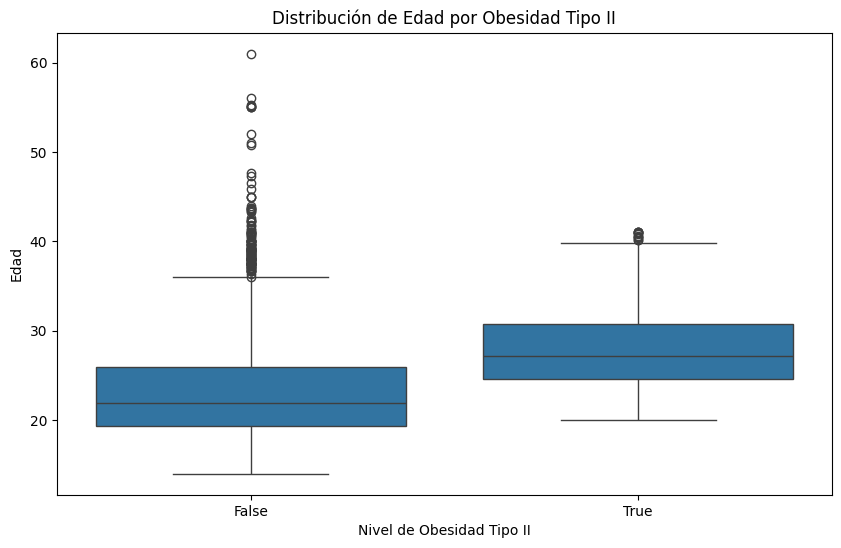

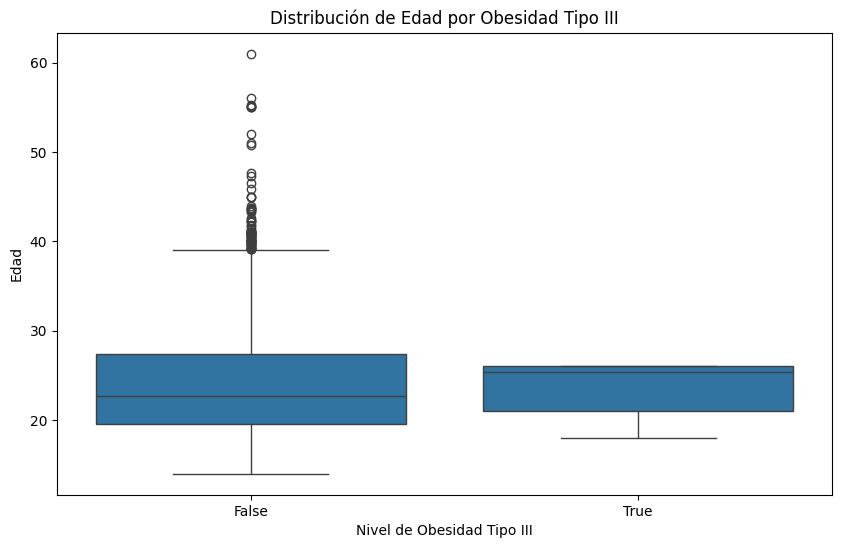

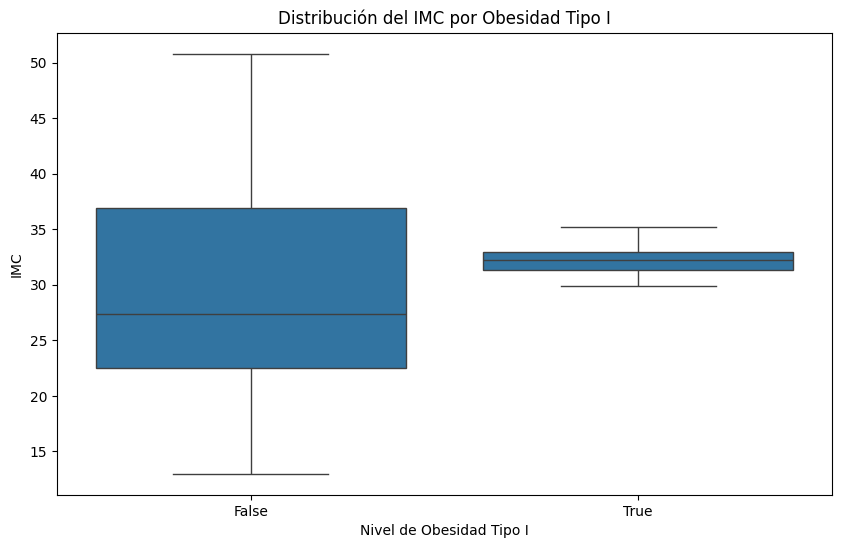

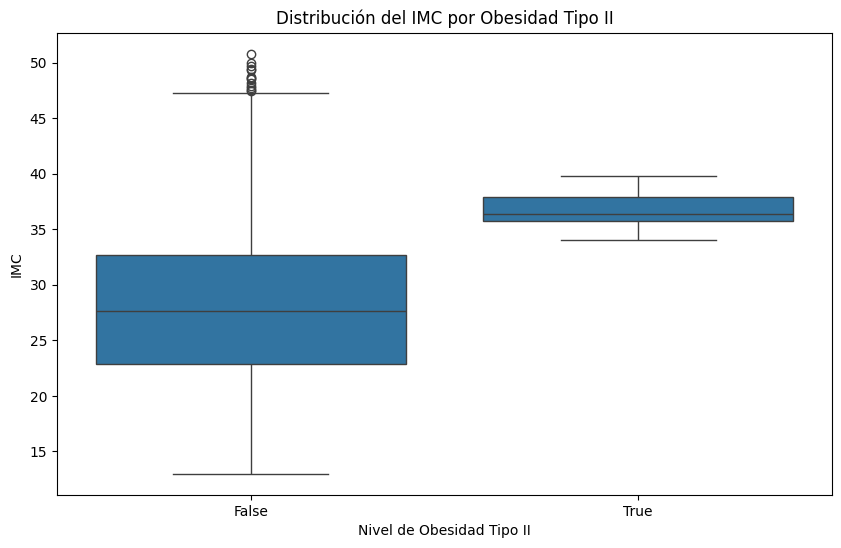

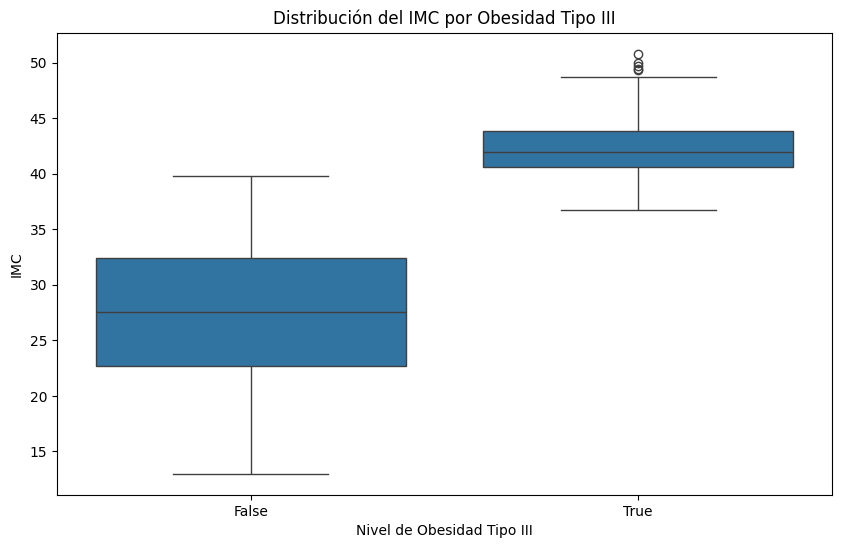

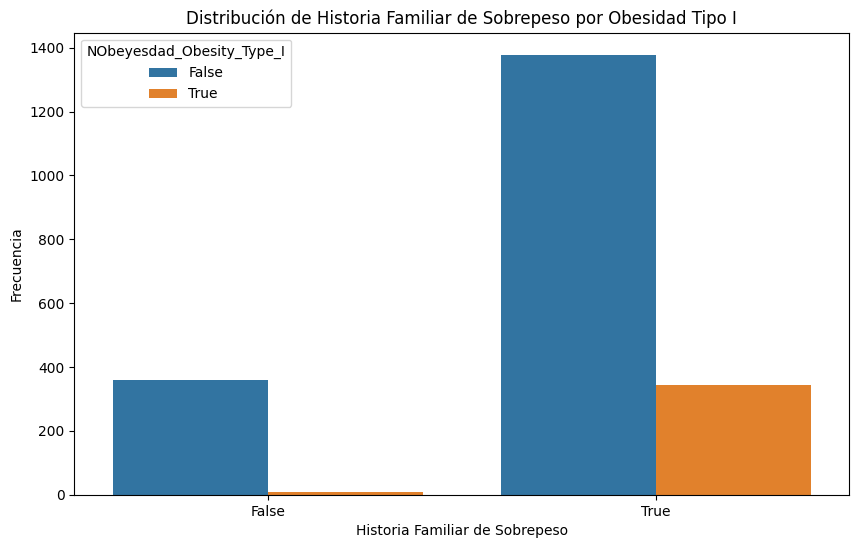

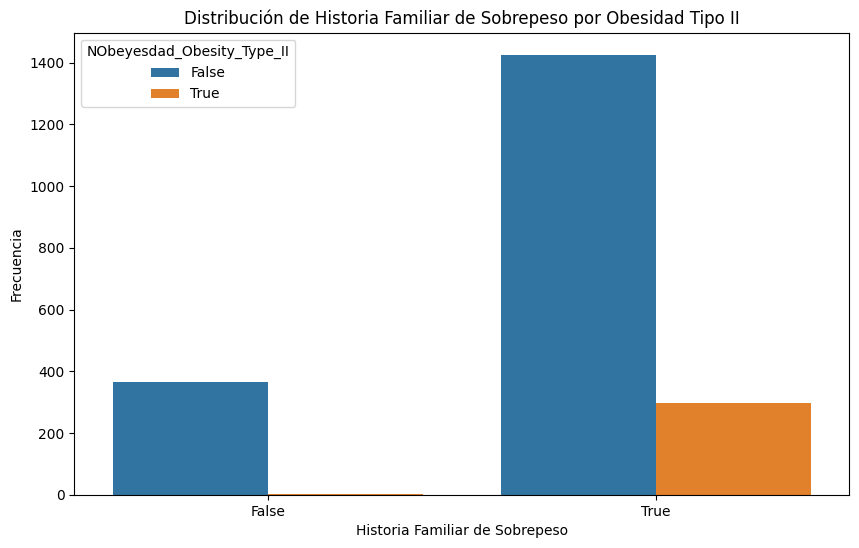

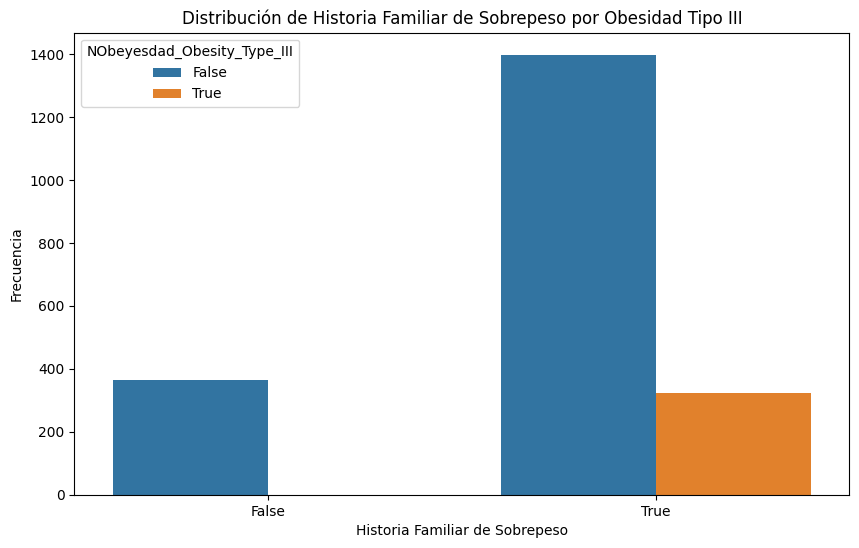

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna para el género con etiquetas 'Hombre' y 'Mujer'
data['Gender'] = data['Gender_Male'].apply(lambda x: 'Male' if x else 'Female')

# Identificación de patrones y relaciones

# Relación entre variables categóricas y el objetivo (suponiendo que 'NObeyesdad' es la variable objetivo)
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad_Obesity_Type_I', data=data)
plt.title('Distribución por Género y Obesidad Tipo I')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables categóricas y el objetivo (NObeyesdad_Obesity_Type_II)
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad_Obesity_Type_II', data=data)
plt.title('Distribución por Género y Obesidad Tipo II')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables categóricas y el objetivo (NObeyesdad_Obesity_Type_III)
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad_Obesity_Type_III', data=data)
plt.title('Distribución por Género y Obesidad Tipo III')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de comorbilidades y obesidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='Age', data=data)
plt.title('Distribución de Edad por Obesidad Tipo I')
plt.xlabel('Nivel de Obesidad Tipo I')
plt.ylabel('Edad')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_II', y='Age', data=data)
plt.title('Distribución de Edad por Obesidad Tipo II')
plt.xlabel('Nivel de Obesidad Tipo II')
plt.ylabel('Edad')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_III', y='Age', data=data)
plt.title('Distribución de Edad por Obesidad Tipo III')
plt.xlabel('Nivel de Obesidad Tipo III')
plt.ylabel('Edad')
plt.show()

# Relación entre IMC y obesidad (Aquí ajustamos para que calculemos el IMC a partir de Height y Weight)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='BMI', data=data)
plt.title('Distribución del IMC por Obesidad Tipo I')
plt.xlabel('Nivel de Obesidad Tipo I')
plt.ylabel('IMC')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_II', y='BMI', data=data)
plt.title('Distribución del IMC por Obesidad Tipo II')
plt.xlabel('Nivel de Obesidad Tipo II')
plt.ylabel('IMC')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_III', y='BMI', data=data)
plt.title('Distribución del IMC por Obesidad Tipo III')
plt.xlabel('Nivel de Obesidad Tipo III')
plt.ylabel('IMC')
plt.show()

# Análisis de comorbilidades (si las columnas de comorbilidades existen)
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', hue='NObeyesdad_Obesity_Type_I', data=data)
plt.title('Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo I')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', hue='NObeyesdad_Obesity_Type_II', data=data)
plt.title('Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo II')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', hue='NObeyesdad_Obesity_Type_III', data=data)
plt.title('Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo III')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()


Interpretación de los Gráficos del Análisis Diagnóstico
1. Distribución por Género y Obesidad Tipo I
Observaciones:

En ambos géneros, hay una proporción considerable de individuos con obesidad tipo I (True).
La proporción de obesidad tipo I parece similar en hombres y mujeres.
Interpretación:

La obesidad tipo I afecta a ambos géneros de manera bastante uniforme, lo que sugiere que el género no es un factor diferenciador significativo para esta categoría de obesidad.
2. Distribución por Género y Obesidad Tipo II
Observaciones:

Hay una mayor proporción de hombres con obesidad tipo II en comparación con las mujeres.
La mayoría de las personas no tienen obesidad tipo II (False), pero entre las que sí tienen, los hombres están más representados.
Interpretación:

La obesidad tipo II parece ser más prevalente entre los hombres, lo que podría indicar la necesidad de enfoques específicos de género para abordar esta categoría de obesidad.
3. Distribución por Género y Obesidad Tipo III
Observaciones:

Similar a la obesidad tipo II, hay una mayor proporción de hombres con obesidad tipo III.
La diferencia entre géneros es más pronunciada en obesidad tipo III.
Interpretación:

La obesidad tipo III es significativamente más común entre los hombres, lo que refuerza la necesidad de estrategias específicas de género en el tratamiento y prevención.
4. Distribución de Edad por Obesidad Tipo I
Observaciones:

Los individuos con obesidad tipo I tienden a ser ligeramente mayores que aquellos sin obesidad tipo I.
Hay una mayor variabilidad en las edades de los individuos sin obesidad tipo I.
Interpretación:

La edad podría ser un factor contribuyente a la obesidad tipo I, aunque no es el único determinante dado el solapamiento considerable.
5. Distribución de Edad por Obesidad Tipo II
Observaciones:

Similar a la obesidad tipo I, los individuos con obesidad tipo II tienden a ser mayores.
La dispersión de edades es mayor en individuos sin obesidad tipo II.
Interpretación:

La tendencia sugiere que la edad está asociada con un mayor riesgo de desarrollar obesidad tipo II.
6. Distribución de Edad por Obesidad Tipo III
Observaciones:

La diferencia de edad entre individuos con y sin obesidad tipo III no es tan marcada como en los otros tipos de obesidad.
La mayoría de los individuos con obesidad tipo III están en un rango de edad más específico.
Interpretación:

La obesidad tipo III puede ser influenciada por otros factores además de la edad, como genética o hábitos de vida específicos.
7. Distribución del IMC por Obesidad Tipo I
Observaciones:

Los individuos con obesidad tipo I tienen un IMC más elevado y menos variabilidad comparado con aquellos sin obesidad tipo I.
Interpretación:

El IMC es un buen indicador para identificar obesidad tipo I, con valores claramente diferenciados entre los grupos.
8. Distribución del IMC por Obesidad Tipo II
Observaciones:

Similar al tipo I, los individuos con obesidad tipo II tienen un IMC elevado, pero hay algunos outliers con un IMC muy alto.
Interpretación:

El IMC sigue siendo un fuerte indicador para obesidad tipo II, aunque con algunos casos extremos que pueden requerir un análisis más detallado.
9. Distribución del IMC por Obesidad Tipo III
Observaciones:

El IMC es significativamente más alto en individuos con obesidad tipo III, con menor variabilidad en comparación con los no obesos tipo III.
Interpretación:

La obesidad tipo III está fuertemente asociada con IMCs muy elevados, lo cual refuerza la importancia de este indicador para la clasificación y tratamiento.
10. Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo I
Observaciones:

La mayoría de los individuos con obesidad tipo I tienen una historia familiar de sobrepeso.
Hay menos individuos sin historia familiar de sobrepeso que tienen obesidad tipo I.
Interpretación:

La historia familiar de sobrepeso es un factor de riesgo significativo para desarrollar obesidad tipo I, sugiriendo una posible predisposición genética.

11. Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo II
Observaciones:

La mayoría de las personas con obesidad tipo II tienen una historia familiar de sobrepeso (True).
Las personas sin obesidad tipo II (False) también tienen una proporción significativa con historia familiar de sobrepeso, pero esta proporción es menor en comparación con aquellas con obesidad tipo II.
Interpretación:

La historia familiar de sobrepeso es un factor de riesgo significativo para la obesidad tipo II. Esto sugiere que las personas con antecedentes familiares de sobrepeso tienen una mayor probabilidad de desarrollar obesidad tipo II.
La intervención temprana en familias con antecedentes de sobrepeso podría ser una estrategia efectiva para prevenir la obesidad tipo II.
12. Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo III
Observaciones:

Similar al tipo II, la mayoría de las personas con obesidad tipo III tienen una historia familiar de sobrepeso (True).
La proporción de personas con obesidad tipo III y sin historia familiar de sobrepeso es significativamente menor.
Interpretación:

La historia familiar de sobrepeso sigue siendo un factor de riesgo significativo también para la obesidad tipo III. Esto refuerza la idea de que hay un componente genético o ambiental fuerte en la predisposición a la obesidad severa.
Las estrategias de prevención deben incluir la consideración de la historia familiar de sobrepeso para identificar y apoyar a los individuos en riesgo de desarrollar obesidad severa.



---



Conclusiones


Conclusiones del Análisis Descriptivo
Distribución de la Edad:

La mayoría de los individuos tienen entre 15 y 30 años, con un pico notable entre 20 y 25 años. La distribución de edades sugiere que la obesidad es prevalente en una población relativamente joven.
Matriz de Correlación:

Existen correlaciones significativas entre el IMC y el peso, lo cual es esperado. Además, factores como la actividad física (FAF) muestran una correlación negativa con la obesidad, sugiriendo que mayores niveles de actividad física están asociados con menores niveles de obesidad.
La historia familiar de sobrepeso (family_history_with_overweight_yes) muestra una correlación moderada con varios tipos de obesidad, destacando la posible influencia genética o ambiental compartida en el desarrollo de la obesidad.
Distribución por Género:

La prevalencia de obesidad tipo II y III es mayor en hombres que en mujeres, indicando posibles diferencias de género en los factores de riesgo y en la predisposición a la obesidad severa.
Conclusiones del Análisis Diagnóstico
Relación entre Edad y Obesidad:

Los individuos con obesidad tipo I, II y III tienden a ser mayores que aquellos sin estos niveles de obesidad. La edad es un factor importante a considerar en el desarrollo de la obesidad, aunque no es el único determinante, dado el solapamiento considerable.
Relación entre IMC y Obesidad:

Los individuos con cualquier tipo de obesidad tienen un IMC significativamente más alto que aquellos sin obesidad. El IMC es un fuerte indicador para identificar y clasificar la obesidad, con valores claramente diferenciados entre los grupos.
Historia Familiar de Sobrepeso:

La historia familiar de sobrepeso es un factor de riesgo significativo para la obesidad tipo II y III. La mayoría de los individuos con obesidad severa tienen antecedentes familiares de sobrepeso, lo que sugiere una predisposición genética o un entorno compartido que contribuye al desarrollo de la obesidad.
Recomendaciones
Intervenciones Preventivas:

Dada la fuerte asociación entre la historia familiar de sobrepeso y la obesidad severa, es crucial implementar programas de prevención dirigidos a familias con antecedentes de sobrepeso. Estos programas deberían enfocarse en la educación nutricional, la promoción de la actividad física y el seguimiento continuo de los individuos en riesgo.
Enfoque Personalizado:

Las diferencias observadas entre géneros en la prevalencia de obesidad tipo II y III sugieren la necesidad de estrategias de intervención personalizadas. Programas específicos para hombres y mujeres pueden ser más efectivos en abordar los factores de riesgo únicos de cada grupo.
Edad como Factor de Riesgo:

La edad es un factor significativo en el desarrollo de la obesidad. Las intervenciones deberían considerar grupos de edad específicos, especialmente dado que la obesidad parece ser más prevalente entre los jóvenes en el conjunto de datos analizado.



---



 Variables y Datos relevantes


Variables Clínicas y de Salud
Historial Médico Completo:

Enfermedades crónicas (diabetes tipo 2, hipertensión, enfermedades cardiovasculares, apnea del sueño, etc.): Estas comorbilidades son cruciales para evaluar la gravedad de la obesidad y la necesidad de intervención quirúrgica.
Antecedentes quirúrgicos: Información sobre cirugías previas y su éxito puede influir en la decisión de realizar una cirugía bariátrica.
Mediciones Biométricas:

Presión arterial: Indicador de hipertensión que es una comorbilidad importante asociada con la obesidad.
Niveles de glucosa en sangre: Indicador de diabetes y riesgo metabólico.
Lípidos sanguíneos (colesterol, triglicéridos): Para evaluar el riesgo cardiovascular.
Evaluación de la Capacidad Funcional:

Pruebas de esfuerzo físico: Para determinar la capacidad funcional y la aptitud para someterse a una cirugía mayor.
Índice de masa grasa y masa muscular: Para una evaluación más detallada del estado corporal del paciente.
Variables Psicosociales
Evaluación Psicológica:

Trastornos alimentarios: Presencia de trastornos como el binge eating disorder (BED) que pueden afectar el éxito de la cirugía.
Evaluación del estado mental: Depresión, ansiedad, y otros factores psicológicos que pueden influir en el éxito postquirúrgico.
Soporte Social:

Red de apoyo: Información sobre el apoyo familiar y social que el paciente tiene, lo cual es crucial para el éxito a largo plazo de la cirugía.
Variables de Comportamiento y Estilo de Vida
Hábitos Alimentarios:

Frecuencia y tipo de comidas: Información detallada sobre la dieta y hábitos alimentarios.
Consumo de alimentos procesados y bebidas azucaradas.
Actividad Física:

Nivel de actividad física diaria: Datos más específicos sobre el tipo y la intensidad de las actividades físicas realizadas.
Consumo de Sustancias:

Consumo de tabaco y alcohol: Factores que pueden afectar la salud general y el resultado de la cirugía.
Variables Socioeconómicas
Nivel Socioeconómico:

Ingreso familiar: Para evaluar la capacidad de acceso a cuidados postoperatorios.
Nivel educativo: Puede influir en la comprensión y adherencia a las recomendaciones médicas.
Acceso a Servicios de Salud:

Cobertura de seguro médico: Importante para evaluar la viabilidad económica de la cirugía y el acceso a cuidados continuos.
Variables Relacionadas con la Cirugía
Evaluación del Riesgo Quirúrgico:

Puntajes de riesgo quirúrgico (como el ASA score): Para evaluar la capacidad del paciente para soportar la cirugía.
Historial de anestesia: Reacciones adversas previas a la anestesia general.
Expectativas del Paciente:

Motivación y expectativas respecto a la cirugía: Evaluar si el paciente tiene expectativas realistas y está motivado para seguir las recomendaciones postoperatorias.